# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [9]:
import cv2

import numpy as np
import scipy as sc
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/cs445/hybrid/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: cannot stat '/content/drive/My Drive/cs445/hybrid/utils.py': No such file or directory


In [8]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline  
import matplotlib.pyplot as plt

In [12]:
im1_file = datadir + 'walle.png'
im2_file = datadir + 'me.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

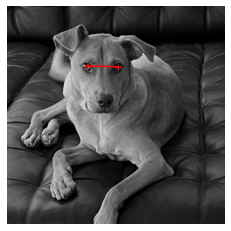

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[395, 295], [550, 300]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

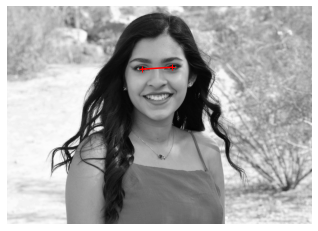

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[1395,650], [1710,630]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
#convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

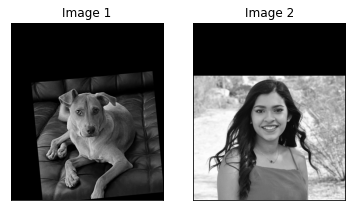

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    low_filter = utils.gaussian_kernel(sigma_low, int(sigma_low))
    filtered1 = signal.convolve2d(im1,low_filter,boundary='symm', mode='same')

    high_filter = utils.gaussian_kernel(sigma_high, int(sigma_high))
    filtered2 = im2-signal.convolve2d(im2,high_filter,boundary='symm', mode='same')
    
    #hybrid = filtered1+filtered2

    return filtered1, filtered2

In [ ]:
sigma_low = 10 # choose parameters that work for your images
sigma_high = 20

low_pass_filter, high_pass_filter = hybridImage(im1, im2, sigma_low, sigma_high)

hybrid = low_pass_filter + high_pass_filter

(Text(0.5, 1.0, 'walle'), [], [])

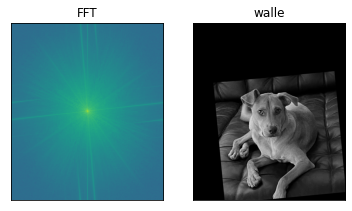

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im1,cmap='gray')
axes[1].set_title('walle'), axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'walle filtered'), [], [])

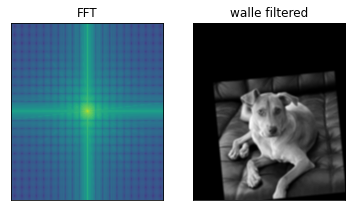

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_filter)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(low_pass_filter,cmap='gray')
axes[1].set_title('walle filtered'), axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'me'), [], [])

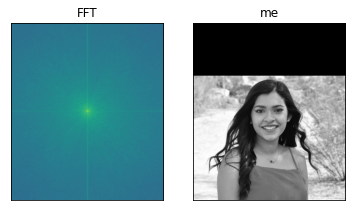

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('me'), axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'me filtered'), [], [])

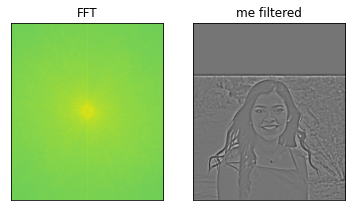

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass_filter)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(high_pass_filter,cmap='gray')
axes[1].set_title('me filtered'), axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'hybrid'), [], [])

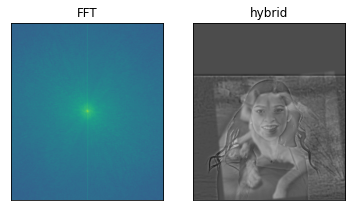

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hybrid,cmap='gray')
axes[1].set_title('hybrid'), axes[1].set_xticks([]), axes[1].set_yticks([])


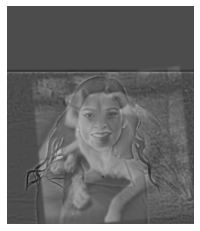

In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(hybrid)

In [ ]:
baby_file = datadir + 'babyme.JPG'
grad_file = datadir + 'bigme.jpg'

baby = np.float32(cv2.imread(baby_file, cv2.IMREAD_GRAYSCALE) / 255.0)
grad = np.float32(cv2.imread(grad_file, cv2.IMREAD_GRAYSCALE) / 255.0)

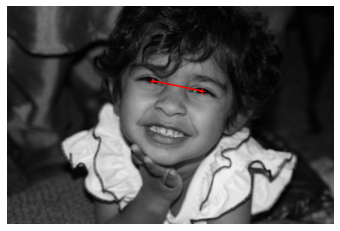

In [ ]:
pts_baby = utils.prompt_eye_selection(baby)
pts_baby = np.array([[1370, 700], [1830, 795]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_baby[:,0], pts_baby[:,1], 'r-+')

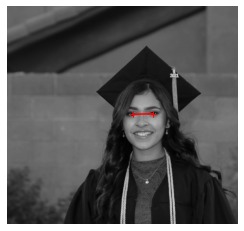

In [ ]:
pts_grad = utils.prompt_eye_selection(grad)
pts_grad = np.array([[1660, 1427], [1930, 1420]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_grad[:,0], pts_grad[:,1], 'r-+')

In [ ]:
baby, grad = utils.align_images(baby_file, grad_file,pts_baby,pts_grad,save_images=False)


In [ ]:
baby = cv2.cvtColor(baby, cv2.COLOR_BGR2GRAY) / 255.0
grad = cv2.cvtColor(grad, cv2.COLOR_BGR2GRAY) / 255.0

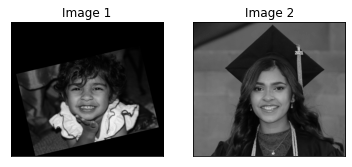

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(baby,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(grad,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
sigma_low = 25 # choose parameters that work for your images
sigma_high = 32

low_pass_filter, high_pass_filter = hybridImage(grad, baby, sigma_low, sigma_high)

hybrid = low_pass_filter + high_pass_filter

(Text(0.5, 1.0, 'grad filtered'), [], [])

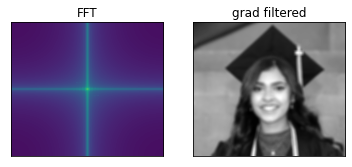

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_filter)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(low_pass_filter,cmap='gray')
axes[1].set_title('grad filtered'), axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'baby filtered'), [], [])

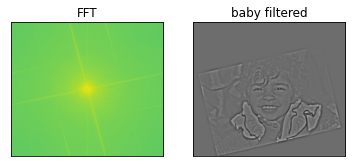

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass_filter)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(high_pass_filter,cmap='gray')
axes[1].set_title('baby filtered'), axes[1].set_xticks([]), axes[1].set_yticks([])

(Text(0.5, 1.0, 'hybrid me'), [], [])

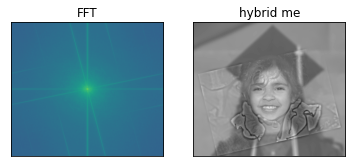

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid)))))
axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hybrid,cmap='gray')
axes[1].set_title('hybrid me'), axes[1].set_xticks([]), axes[1].set_yticks([])

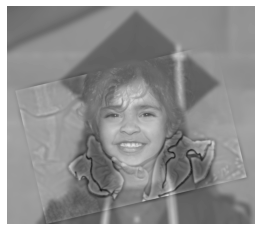

In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

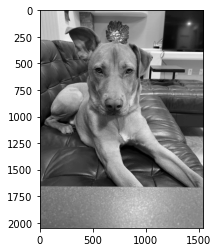

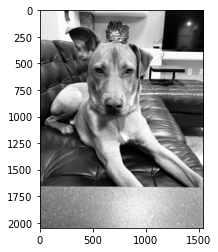

In [ ]:
im3_file = datadir + 'contrast.jpg'
im3 = cv2.imread(im3_file,cv2.IMREAD_GRAYSCALE)


im3_eq = cv2.equalizeHist(im3)
im3_final = sc.ndimage.gaussian_filter(im3_eq, sigma=1)

plt.figure()
plt.imshow(im3,cmap='gray')

plt.figure()
plt.imshow(im3_final,cmap='gray')

#### Color enhancement 

([], [])

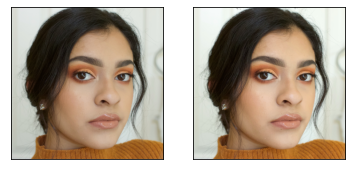

In [ ]:
im4_file = datadir + 'runali.png'
im4 = cv2.imread(im4_file)
hsv = cv2.cvtColor(im4,cv2.COLOR_BGR2HSV)

hsv[:,:,2] = hsv[:,:,2]*1.085
hsv[:,:,2][hsv[:,:,2] > 255] = 255

fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(im4, cv2.COLOR_BGR2RGB))
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
axes[1].set_xticks([]), axes[1].set_yticks([])



#### Color shift

([], [])

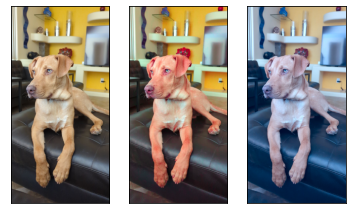

In [ ]:
im5_file = datadir + 'sitting.jpg'
im5 = cv2.imread(im5_file)
lab_red = cv2.cvtColor(im5,cv2.COLOR_BGR2LAB)
lab_blue = cv2.cvtColor(im5,cv2.COLOR_BGR2LAB)

lab_red[:,:,1] = lab_red[:,:,1]*3

lab_blue[:,:,2] = lab_blue[:,:,2]*0.8

fig, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.cvtColor(im5, cv2.COLOR_BGR2RGB))
axes[0].set_xticks([]), axes[0].set_yticks([])
labr2bgr = cv2.cvtColor(lab_red, cv2.COLOR_LAB2BGR)
axes[1].imshow(cv2.cvtColor(labr2bgr, cv2.COLOR_BGR2RGB))
axes[1].set_xticks([]), axes[1].set_yticks([])
labb2bgr = cv2.cvtColor(lab_blue, cv2.COLOR_LAB2BGR)
axes[2].imshow(cv2.cvtColor(labb2bgr, cv2.COLOR_BGR2RGB))
axes[2].set_xticks([]), axes[2].set_yticks([])
